In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
%autosave 60

Autosaving every 60 seconds


In [2]:
data=(np.loadtxt('../Codes/Ising_model/output.txt'))
E = data[:,0]

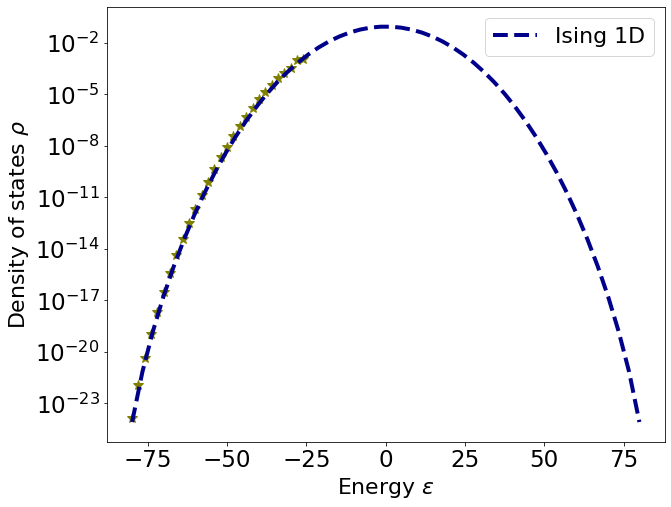

In [3]:
fig, ax = plt.subplots(figsize = (10,8))
L = 80
h = 20
ds = np.linspace(0, L );
data_E = np.histogram(E, bins = 'auto', density = True);
ax.plot(data_E[1][:-1], data_E[0]/(1e10*(2**(L))**(-1)*np.exp(-data_E[1][:-1]/1)), color = 'olive', linestyle = '', marker = '*', ms = 10);
#ax.plot(data_E[1][:-1], data_E[0], color = 'olive', linestyle = '', marker = '*', ms = 10);

#ax.plot(data_E[1][:-1], (2**(50))**(-1)*np.exp(-data_E[1][:-1]/1)*sc.comb(L, (data_E[1][:-1]+L)/2), color = 'olive', linestyle = '--', marker = '', ms = 10);
ax.plot(ds*2-L, sc.comb(L, ds)/2**(L) , linewidth = 4 , label = 'Ising 1D', color = 'darkblue', linestyle = '--');
ax.set_yscale('log');
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)
fig.savefig('../Figures/Density_of_States_MCMC_Ising1D_temperature.png')

In [4]:
print('%.2e'%(2**80),'%.2e'%(len(E)))

1.21e+24 8.00e+06


# MM Toy model

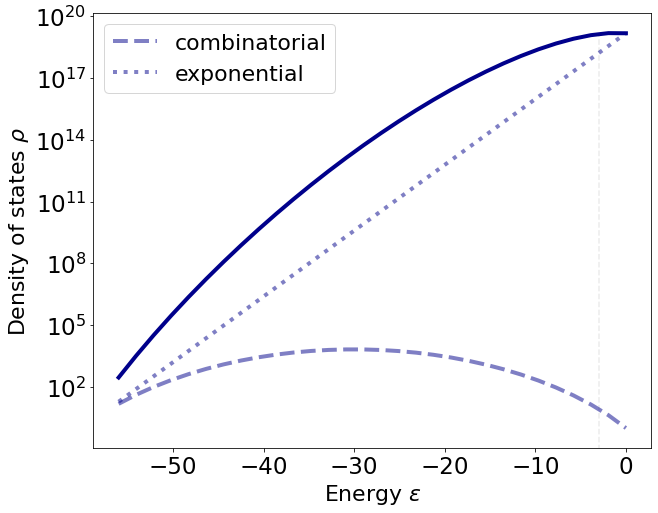

In [76]:
fig, ax = plt.subplots(figsize = (10,8))
L = 15 #Seq. lenght
d = 20#Alphabet size
e0 = 4
k = np.linspace(1, L, L*2);
ax.plot(e0*(k-L), sc.comb(L, k) , linewidth = 4 , label = 'combinatorial', color = 'darkblue', linestyle = '--', alpha = .5);
ax.plot(e0*(k-L), (d-1)**k , linewidth = 4, label = 'exponential' , color = 'darkblue', linestyle = 'dotted', alpha = .5);
ax.plot(e0*(k-L), sc.comb(L, k)*(d-1)**k , linewidth = 4 , color = 'darkblue', linestyle = '-');
ax.vlines(-e0*L/d, ax.get_ylim()[0], ax.get_ylim()[1], linestyle = '--', alpha = .3, color = 'silver')


ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)


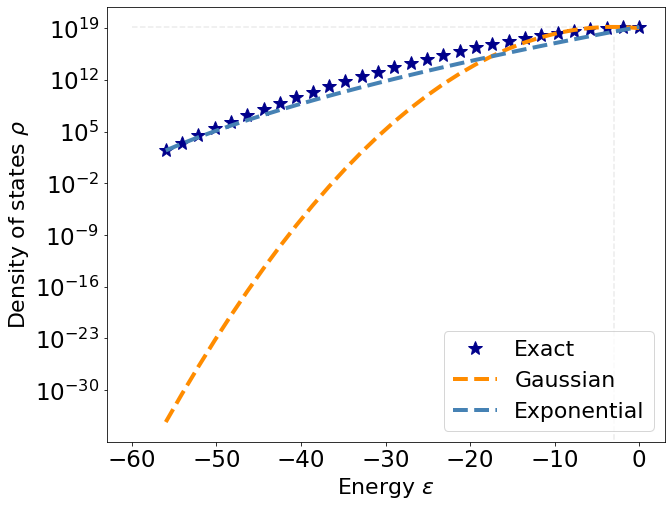

In [78]:
fig, ax = plt.subplots(figsize = (10,8))

def P0_gaussian(k):
    return d**L*np.exp(-0.5*((((d-1)*L)/d)-k)**2/(((1/d)-(1/d**2))*L))/(np.sqrt(2*np.pi*(((1/d)-(1/d**2))*L))) 
def P0(k):
    return np.exp(k*(np.log((L/k)*(d-1))))


ax.plot(e0*(k-L), sc.comb(L, k)*(d-1)**k , linewidth = 0 , label = 'Exact', color = 'darkblue', linestyle = '--', marker = '*', ms = 15);

ax.plot(e0*(k-L), P0_gaussian(k) , linewidth = 4 , label = 'Gaussian', color = 'darkorange', linestyle = '--');

#ax.plot(k, 1*np.exp((2-(4*0)/L)*k) , linewidth = 4 , label = 'Exponential gaussian', color = 'indigo', linestyle = '--');
ax.plot(e0*(k-L), P0(k) , linewidth = 4 , label = 'Exponential', color = 'steelblue', linestyle = '--');


ax.hlines((d-1)**L, -L*e0,0, linestyle = '--', alpha = .3, color = 'silver')
ax.vlines(-e0*L/d, ax.get_ylim()[0], ax.get_ylim()[1], linestyle = '--', alpha = .3, color = 'silver')

ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)


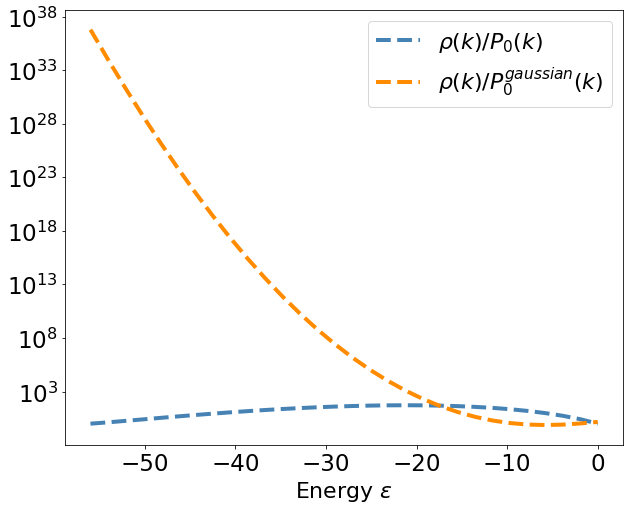

In [79]:
fig, ax = plt.subplots(figsize = (10,8))

ax.plot(e0*(k-L), ((sc.comb(L, k)*(d-1)**k)/P0(k)), linewidth = 4 , label = r'$\rho(k)/P_0(k)$', color = 'steelblue', linestyle = '--');
ax.plot(e0*(k-L), ((sc.comb(L, k)*(d-1)**k)/P0_gaussian(k)), linewidth = 4 , label = r'$\rho(k)/P_0^{gaussian}(k)$', color = 'darkorange', linestyle = '--');


ax.set_yscale('log')
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)



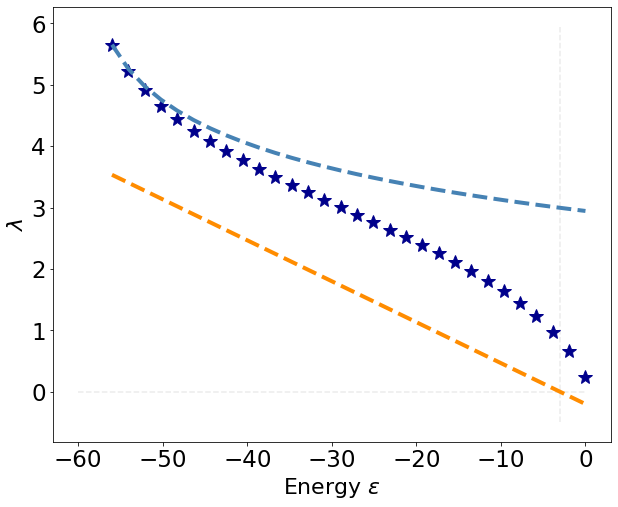

In [80]:
fig, ax = plt.subplots(figsize = (10,8))


ax.plot(e0*(k-L), (np.log(sc.comb(L, k)*(d-1)**(k)) - np.log(sc.comb(L, (k-1))*(d-1)**(k-1))) , linewidth = 4 , label = 'Exact', color = 'darkblue', linestyle = '', marker = '*', ms = 15);
ax.plot(e0*(k-L), (4*((d-1)/d) - (4*k)/(L)), linewidth = 4 , label = 'Gaussian 2', color = 'darkorange', linestyle = '--');
ax.plot(e0*(k-L), np.ones_like(k)*np.log((L/k)*(d-1)), linewidth = 4 , label = 'Exponential 2', color = 'steelblue', linestyle = '--');

ax.hlines(0, -L*e0,0, linestyle = '--', alpha = .3, color = 'silver')
ax.vlines(-e0*L/d, ax.get_ylim()[0], ax.get_ylim()[1], linestyle = '--', alpha = .3, color = 'silver')


#ax.set_ylim(bottom = 0);
#ax.set_xlim(left = 0, right = 15);
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'$\lambda$', fontsize = 22)
ax.tick_params(labelsize = 23)
#ax.legend(loc = 0, fontsize = 22)


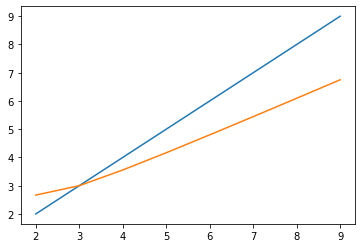

In [14]:
ds = np.arange(2, 10)
plt.plot(ds, ds)
plt.plot(ds, 10/(L*((1/ds)-(1/ds**2))))

In [46]:
(d**L)*0.00001

10737.41824

-11.25 344551.8961378237


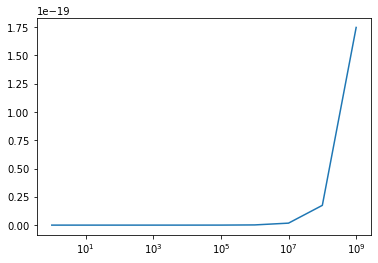

In [44]:
d = 4
e0=3
A = np.logspace(0, 9, 10)
E=-(e0*L)/d
kd = np.exp(E + 8*e0)
plt.plot(A, (A*6.02214076e-23)/((A*6.02214076e-23)+(kd)))
plt.xscale('log')
print(E,kd)


In [56]:
for d in [2, 4, 20]:
    print(np.logspace(2, 5, 5-2+1))

[   100.   1000.  10000. 100000.]
[   100.   1000.  10000. 100000.]
[   100.   1000.  10000. 100000.]
